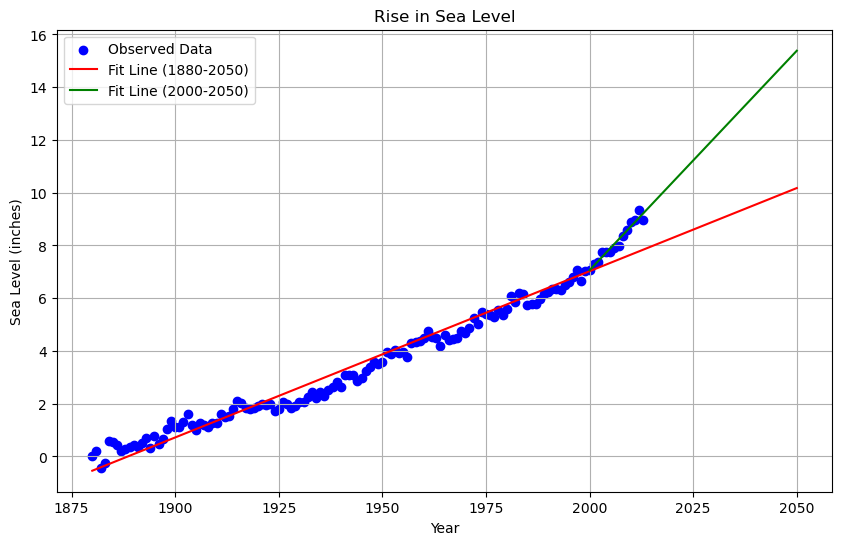

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the dataset
df = pd.read_csv("epa-sea-level.csv")

def draw_plot():
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', label='Observed Data')

    # Create first line of best fit (all data)
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    years_extended = pd.Series(range(1880, 2051))  # Extend x-axis to 2050
    sea_level_fit = slope * years_extended + intercept
    plt.plot(years_extended, sea_level_fit, color='red', label='Fit Line (1880-2050)')

    # Create second line of best fit (from year 2000 onwards)
    df_recent = df[df['Year'] >= 2000]
    slope_recent, intercept_recent, r_value_recent, p_value_recent, std_err_recent = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
    years_recent_extended = pd.Series(range(2000, 2051))  # Extend x-axis to 2050
    sea_level_fit_recent = slope_recent * years_recent_extended + intercept_recent
    plt.plot(years_recent_extended, sea_level_fit_recent, color='green', label='Fit Line (2000-2050)')

    # Add labels and title
    plt.title('Rise in Sea Level')
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.legend()
    plt.grid()

    # Save the plot
    plt.savefig('sea_level_plot.png')
    plt.show()

# Call the function to draw the plot
draw_plot()
